In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import re
import pandas as pd

# Initialize an empty list to store dataframes
df_list = []

# Regular expression to match the filenames and extract IDs
pattern = re.compile(r"curvature_hyperboloid_ratio_4_from_(\d+)_to_(\d+)\.csv")

# Iterate over all files in the directory (replace '.' with your directory path)
for filename in os.listdir('.'):
    match = pattern.match(filename)
    if match:
        # Extract the range of ids from the filename
        start_id, end_id = map(int, match.groups())

        # Read the csv file into a DataFrame
        df = pd.read_csv(filename, header=None)
        
        # Create a new column for the ids
        df['id'] = range(start_id, end_id)
        
        # Append the DataFrame to the list
        df_list.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(df_list, ignore_index=True)
final_df = final_df.set_index('id').sort_index()
# Save the final DataFrame to a new csv file
# final_df.to_csv('curvature_hyperboloid_ratio_4_combined.csv', index=False)
np.savetxt("curvature_hyperboloid_ratio_4_combined.csv", final_df.values)
# Show the head of the final DataFrame as a sample
num_eval = final_df.shape[0]

In [3]:
hyperboloid = np.loadtxt('hyperboloid_cloud_ratio_4.csv', delimiter=',')
hyper_cutted_index = np.loadtxt('hyperboloid_cloud_ratio_4_cutted_index.csv', delimiter=',').astype(int)
hyperboloid = hyperboloid[hyper_cutted_index]
hyperboloid = hyperboloid[:num_eval]

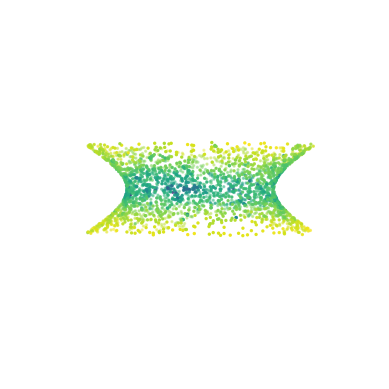

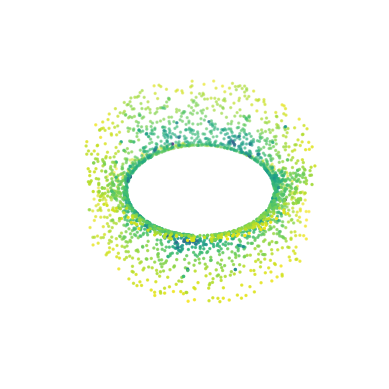

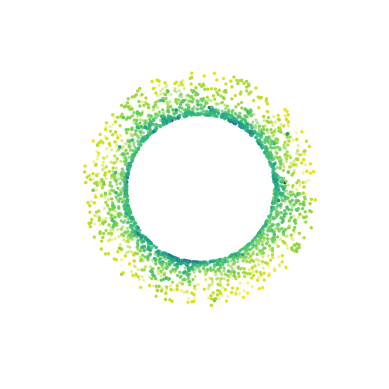

In [12]:
v = final_df.values
# Visualize the point cloud

# # Find the minimum and maximum values across all axes
# min_val = hyperboloid[:num_eval].min()
# max_val = hyperboloid[:num_eval].max()

# # Set the same limits for all axes to ensure equal unit lengths
# ax.set_xlim([min_val, max_val])
# ax.set_ylim([min_val, max_val])
# ax.set_zlim([min_val, max_val])
# # Add axis labels
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')

hyper_post_cutted_index = abs(hyperboloid[:, 2]) <= .6

cc = - v
# cc =  v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[hyper_post_cutted_index, 0], hyperboloid[hyper_post_cutted_index, 1], hyperboloid[hyper_post_cutted_index, 2], s=2, c = cc[hyper_post_cutted_index])
# Add a colorbar
# cbar = plt.colorbar(scatter)
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(0, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_ratio_4.png", dpi = 300)


cc = - v
# cc =  v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[hyper_post_cutted_index, 0], hyperboloid[hyper_post_cutted_index, 1], hyperboloid[hyper_post_cutted_index, 2], s=2, c = cc[hyper_post_cutted_index])
# Add a colorbar
# cbar = plt.colorbar(scatter)
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(45, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[hyper_post_cutted_index, 0], hyperboloid[hyper_post_cutted_index, 1], hyperboloid[hyper_post_cutted_index, 2], s=2, c = cc[hyper_post_cutted_index])
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(90, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_birdview_ratio_4.png", dpi = 300)

In [5]:
(1-final_df.isna()).sum()

0    3313
dtype: int64

In [15]:
hyper_post_cutted_index.sum()

2562

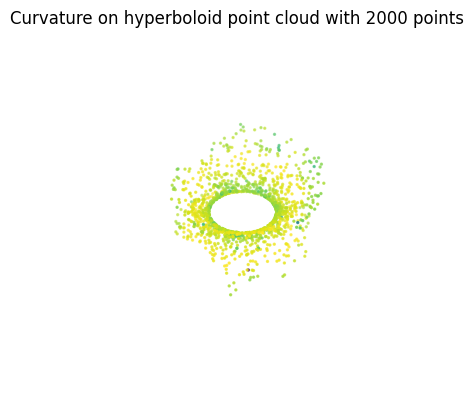

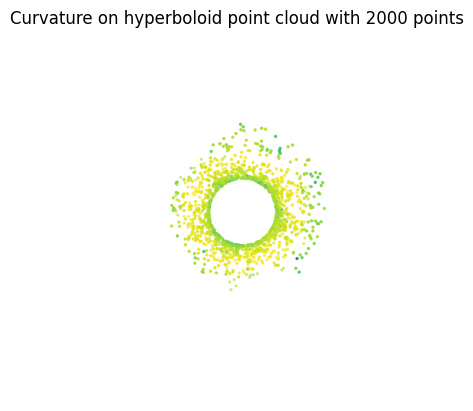

In [6]:
num_eval = 2000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
cc = - v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(45, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=2, c = cc)
ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(90, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_birdview_ratio_4.png", dpi = 300)

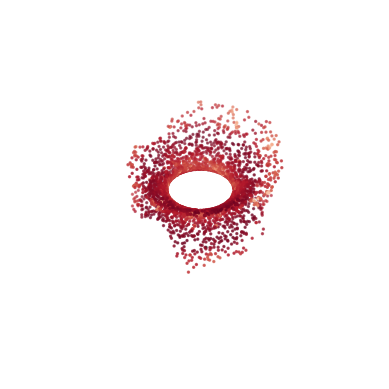

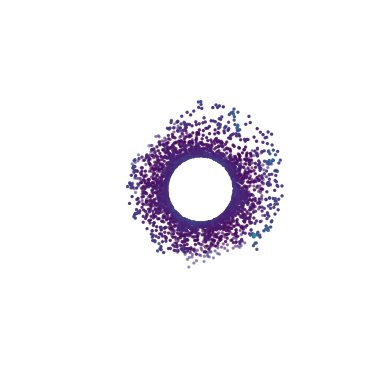

In [7]:
from matplotlib.colors import Normalize, TwoSlopeNorm

num_eval = 5000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
# cc = - v
cc = v

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=2, c = cc, cmap='RdGy')
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(45, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=2, c = cc)
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(90, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_birdview_ratio_4.png", dpi = 300)

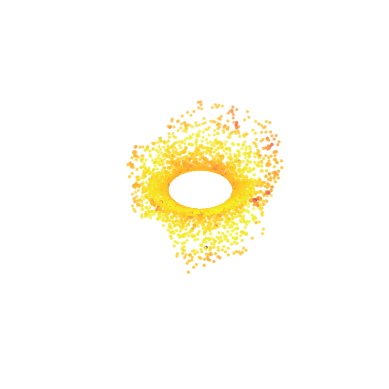

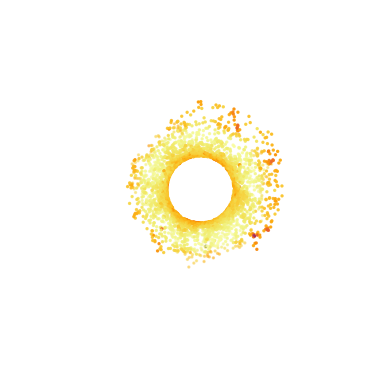

In [8]:
from matplotlib.colors import Normalize, TwoSlopeNorm

num_eval = 5000
v = final_df.values[:num_eval, :]
# Visualize the point cloud
cc = - v
# cc = v

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=2, c = cc, cmap='plasma')
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(45, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_ratio_4.png", dpi = 300)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(hyperboloid[:num_eval, 0], hyperboloid[:num_eval, 1], hyperboloid[:num_eval, 2], s=2, c = cc, cmap='inferno')
# ax.set_title(f"Curvature on hyperboloid point cloud with {num_eval} points")
ax.view_init(90, 0)
plt.axis('off')
ax.set_aspect('equal')
plt.savefig("hyperboloid_birdview_ratio_4.png", dpi = 300)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        2.500e+01, 1.690e+02, 1.488e+03, 1.625e+03]),
 array([-1.03299225, -1.03015557, -1.02731889, -1.02448221, -1.02164554,
        -1.01880886, -1.01597218, -1.0131355 , -1.01029882, -1.00746214,
        -1.00462546]),
 <BarContainer object of 10 artists>)

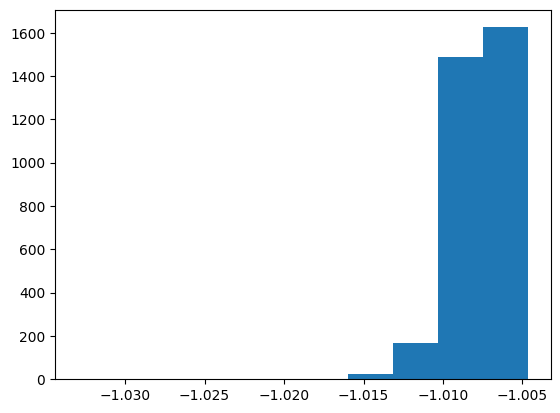

In [9]:
plt.hist(cc)